In [2]:
#-------Importing Packages-----#
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import SEACells
import os
from scipy.io import mmread #Reading in mtx file 
from scipy.sparse import csr_matrix #convert from coo to csr matrix

In [3]:
#-------Setting up Plot Aesthetics-----#
%matplotlib inline
sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [2, 2]
matplotlib.rcParams['figure.dpi'] = 300

In [4]:
#-----Loading in ATAC Object-----#
ConversionDirectory =  "/projects/b1217/HHA/Multiome_Scanpy_Conversion/Full_Atlas/"
Matrix_atac = sc.read(os.path.join(ConversionDirectory, "HHA_Matrix_Multiome_ATAC_SEACell_5_30_25.h5ad"))
Matrix_atac

AnnData object with n_obs × n_vars = 7728 × 503457
    obs: 'barcode', 'Sample', 'TSSEnrichment', 'ReadsInTSS', 'ReadsInPromoter', 'ReadsInBlacklist', 'PromoterRatio', 'PassQC', 'NucleosomeRatio', 'nMultiFrags', 'nMonoFrags', 'nFrags', 'nDiFrags', 'DoubletScore', 'DoubletEnrichment', 'BlacklistRatio', 'UnifiedBarcode', 'Amulet_nAbove2', 'Amulet_total_nAbove2', 'Amulet_p_value', 'Amulet_q_value', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.ribo', 'DonorID', 'Isolation', 'Sex', 'Age', 'DoubletStatus', 'scDblFinder.score', 'Phase', 'MultiomeAnnotationRNA', 'BroadAnnotation', 'GlobalAnnotation', 'FinalAnnotation', 'GeneralAnnotation', 'UnintegratedClusters', 'HarmonyClusters_0.2', 'HarmonyClusters_0.3', 'HarmonyClusters_0.4', 'PeakCallingAnnotation', 'ReadsInPeaks', 'FRIP', 'MatrixAnnotationBroad', 'MatrixAnnotationFine', 'ATAC_UMAP1', 'ATAC_UMAP2', 'WNN_UMAP1', 'WNN_UMAP2', 'SEACell'
    var: 'seqnames', 'start', 'end', 'width', 'strand', 'score', 'replicateScoreQuantile', 'group

In [5]:
#------Writing Metacell Mappings to DataFrame--------#
metacell_mappings = pd.DataFrame({"UnifiedBarcode": Matrix_atac.obs["UnifiedBarcode"],
                                 "SEACell": Matrix_atac.obs["SEACell"]})
metacell_mappings
metacell_mappings.to_csv("/projects/b1217/HHA/Matrix_ATAC_SEACells/HHA_Multiome_Matrix_Metacell_Mappings_5_30_25.csv")

/projects/b1217/Chris/condaenvs/SEACellsEnv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/projects/b1217/Chris/condaenvs/SEACellsEnv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/projects/b1217/Chris/condaenvs/SEACellsEnv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


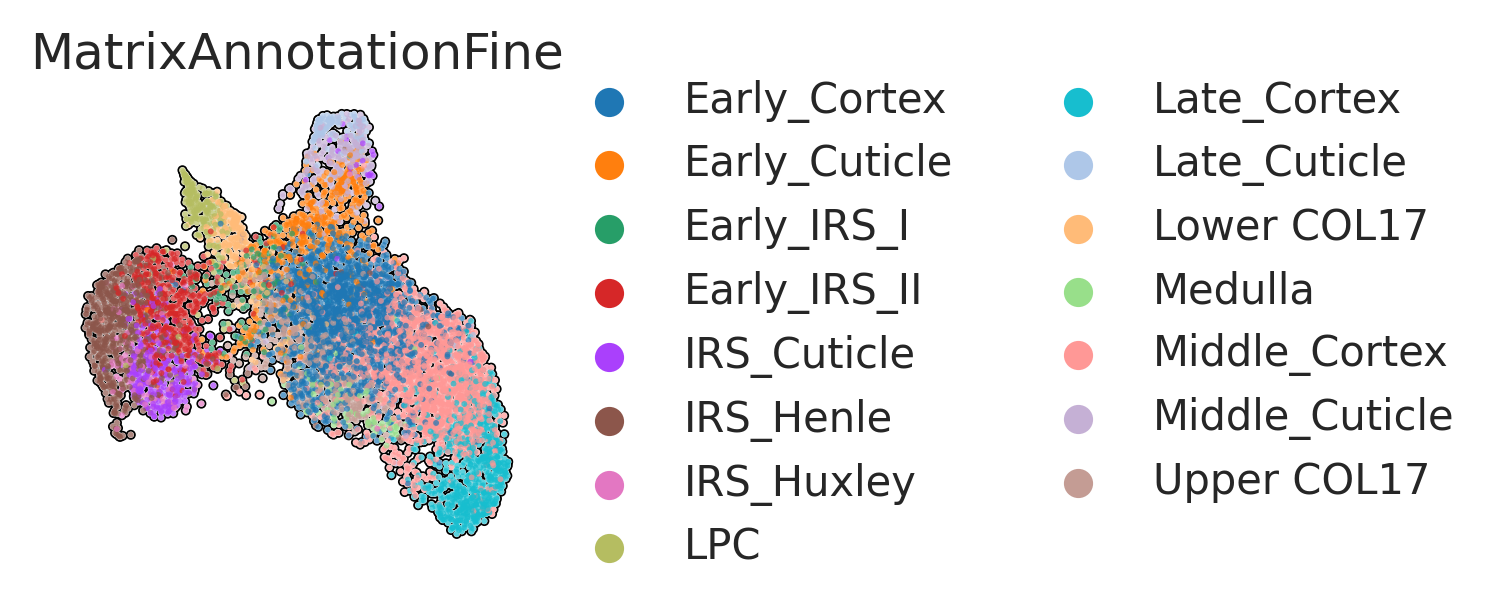

/projects/b1217/Chris/condaenvs/SEACellsEnv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/projects/b1217/Chris/condaenvs/SEACellsEnv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/projects/b1217/Chris/condaenvs/SEACellsEnv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


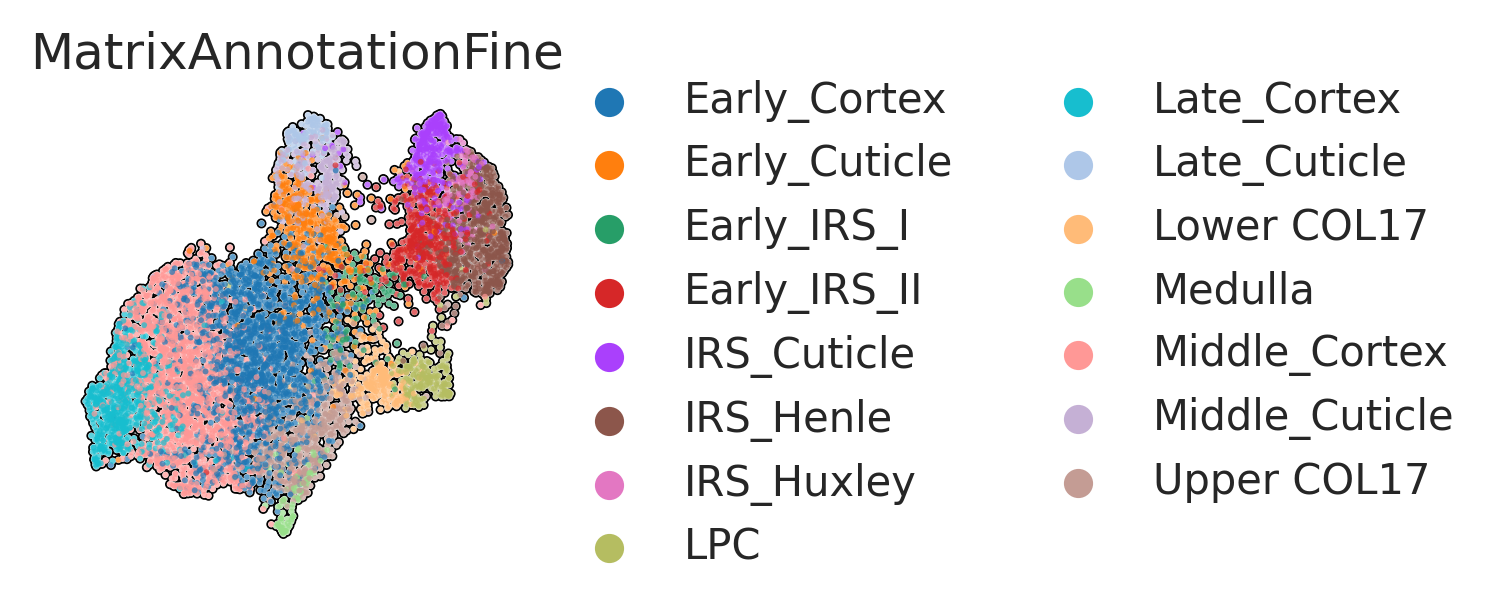

In [6]:
#--------Plotting Clusters------#
#RNA UMAP
sc.pl.embedding(Matrix_atac,
    color="MatrixAnnotationFine",
    basis = "X_umap_atac",
    frameon=False,
    add_outline=True,
    size = 8)
#WNN UMAP
sc.pl.embedding(Matrix_atac,
    color="MatrixAnnotationFine",
    basis = "X_umap_wnn",
    frameon=False,
    add_outline=True,
    size = 8)

In [7]:
#------Loading in Data from Seurat------#
print("Loading in Data")
ConversionDirectory =  "/projects/b1217/HHA/Bulb_Recluster_5_22_AnnData/"
#Reading in the raw count matrix from seurat.combined
counts = mmread(os.path.join(ConversionDirectory, "HHA_Multiome_Matrix_FullConversion_RawCounts_5_30_25.mtx"))
counts = csr_matrix(counts.transpose()) #transposing to cell x gene matrix and converting to csr format
#Reading in the log normalized count matrix from seurat.combined
logcounts = mmread(os.path.join(ConversionDirectory, "HHA_Multiome_Matrix_FullConversion_Expression_LogCounts_5_30_25.mtx"))
logcounts = csr_matrix(logcounts.transpose()) #transposing to cell x gene matrix and converting to csr format
#Contains metadata, barcodes, and umap embeddings 
metadata = pd.read_csv(os.path.join(ConversionDirectory, "HHA_Multiome_Matrix_FullConversion_Metadata_5_30_25.csv"))
#Contains gene names 
gene_names = pd.read_csv(os.path.join(ConversionDirectory, "HHA_Multiome_Matrix_FullConversion_GeneNames_5_30_25.csv"))

#-----Creating anndata object-------#
print("Building Object")
#using unnormalized counts
Matrix_rna = ad.AnnData(counts) #creating anndata object
Matrix_rna.obs_names = metadata["UnifiedBarcode"] #Adding barcodes as obs names 
Matrix_rna.var_names = gene_names["gene"] #adding gene names 
print(Matrix_rna)
print(Matrix_rna.obs_names[:10])
print(Matrix_rna.var_names[:10])
scvi = pd.read_csv(os.path.join(ConversionDirectory, "HHA_Multiome_Matrix_FullConversion_scVI_Embeddings_5_30_25.csv"))
scvi["barcode"] = metadata["UnifiedBarcode"]

#------Adding metadata to anndata--------#
Matrix_rna.obs = metadata
Matrix_rna.obs_names = metadata["UnifiedBarcode"]

#-----Adding dimensionality reductions to obsm-----#
#RNA UMAP
X_umap_rna = metadata.set_index("UnifiedBarcode")[["UMAP_1", "UMAP_2"]]
Matrix_rna.obsm['X_umap_rna'] = X_umap_rna.loc[Matrix_rna.obs_names].values
#WNN UMAP
X_umap_wnn = metadata.set_index("UnifiedBarcode")[["WNN_UMAP_1", "WNN_UMAP_2"]]
Matrix_rna.obsm['X_umap_wnn'] = X_umap_wnn.loc[Matrix_rna.obs_names].values
#scVI
X_scvi = scvi.set_index("barcode")
Matrix_rna.obsm['X_scvi'] = X_scvi.loc[Matrix_rna.obs_names].values
print(Matrix_rna.obs.head())

Loading in Data
Building Object
AnnData object with n_obs × n_vars = 7728 × 48834
Index(['EL_C5_TCTTGTCCAGCTTAGC-1', 'EL_C5_TAGTTGTCACCAGCAT-1',
       'EL_C5_TGCTTTAGTAGTTAAC-1', 'EL_C5_GACTAATGTTTCGCGC-1',
       'EL_C5_GTCAGGCTCTCGCCCA-1', 'EL_C5_AACATAGCAGTATGTT-1',
       'EL_C5_TGGTTGAGTTGAGGTC-1', 'EL_C5_CGATTCCTCTGCAAAC-1',
       'EL_C5_AGAGGAACAGGACCTT-1', 'EL_C5_GAGCAAATCCTAGTTT-1'],
      dtype='object', name='UnifiedBarcode')
Index(['ENSG00000238009', 'ENSG00000241860', 'ENSG00000290385',
       'ENSG00000291215', 'LINC01409', 'ENSG00000290784', 'FAM87B',
       'LINC00115', 'LINC01128', 'ENSG00000288531'],
      dtype='object', name='gene')
                         orig.ident  nCount_RNA  nFeature_RNA  percent.mt  \
UnifiedBarcode                                                              
EL_C5_TCTTGTCCAGCTTAGC-1      EL_C5       14518          4398    8.968177   
EL_C5_TAGTTGTCACCAGCAT-1      EL_C5       14470          4681   14.125777   
EL_C5_TGCTTTAGTAGTTAAC-1     

In [8]:
#-------Adding Log Normalized Counts to AnnData-----#
# Copy the counts to ".raw" attribute of the anndata since it is necessary for downstream analysis
raw_ad = sc.AnnData(Matrix_rna.X)
raw_ad.obs_names, raw_ad.var_names = Matrix_rna.obs_names, Matrix_rna.var_names
Matrix_rna.raw = raw_ad
Matrix_rna.layers["LogCounts"] = logcounts
Matrix_rna.X = Matrix_rna.layers["LogCounts"].copy()

/projects/b1217/Chris/condaenvs/SEACellsEnv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/projects/b1217/Chris/condaenvs/SEACellsEnv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/projects/b1217/Chris/condaenvs/SEACellsEnv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


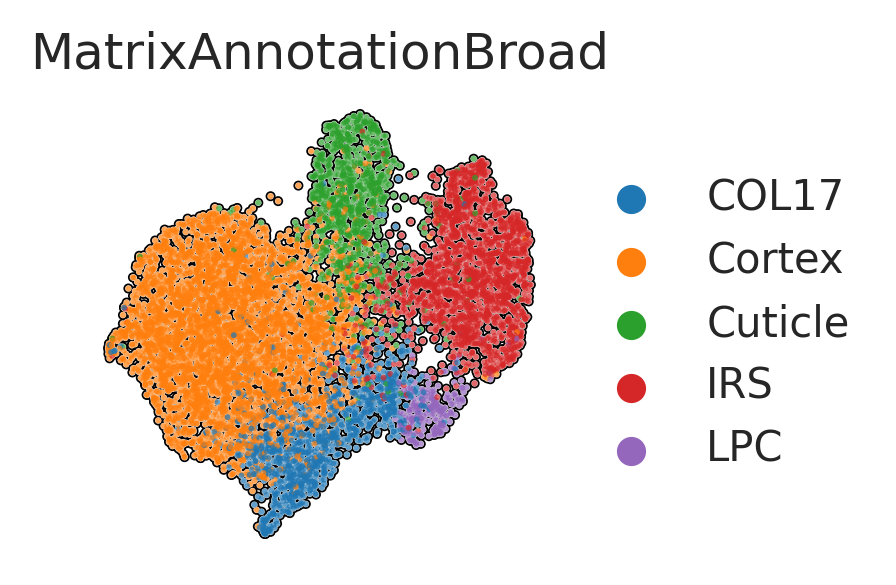

/projects/b1217/Chris/condaenvs/SEACellsEnv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/projects/b1217/Chris/condaenvs/SEACellsEnv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/projects/b1217/Chris/condaenvs/SEACellsEnv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


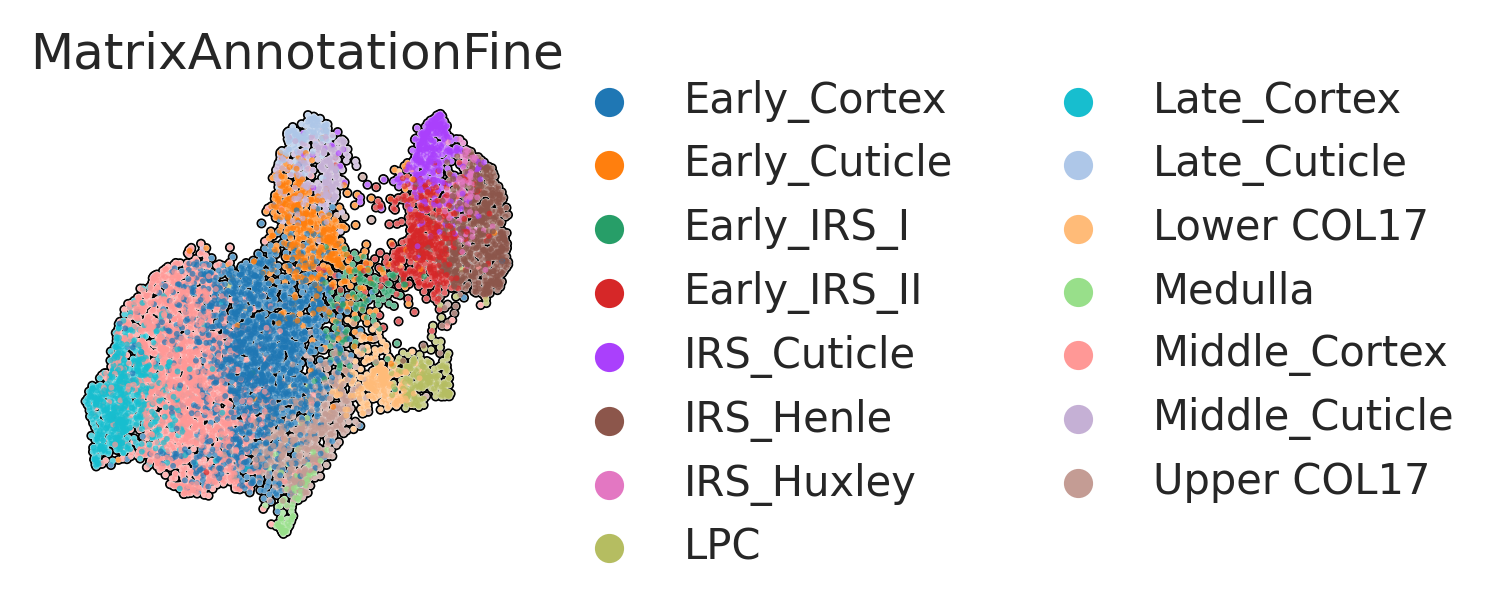

In [9]:
#--------Plotting Clusters------#
#RNA UMAP
sc.pl.embedding(Matrix_rna,
                color="MatrixAnnotationBroad",
                basis = "X_umap_rna",
                frameon=False,
                add_outline=True,
                size = 8)
#WNN UMAP
sc.pl.embedding(Matrix_rna,
                color="MatrixAnnotationFine",
                basis = "X_umap_wnn",
                frameon=False,
                add_outline=True,
                size = 8)

---------------------------------------------
        Gene Expression on RNA UMAP
---------------------------------------------


/projects/b1217/Chris/condaenvs/SEACellsEnv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/projects/b1217/Chris/condaenvs/SEACellsEnv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(


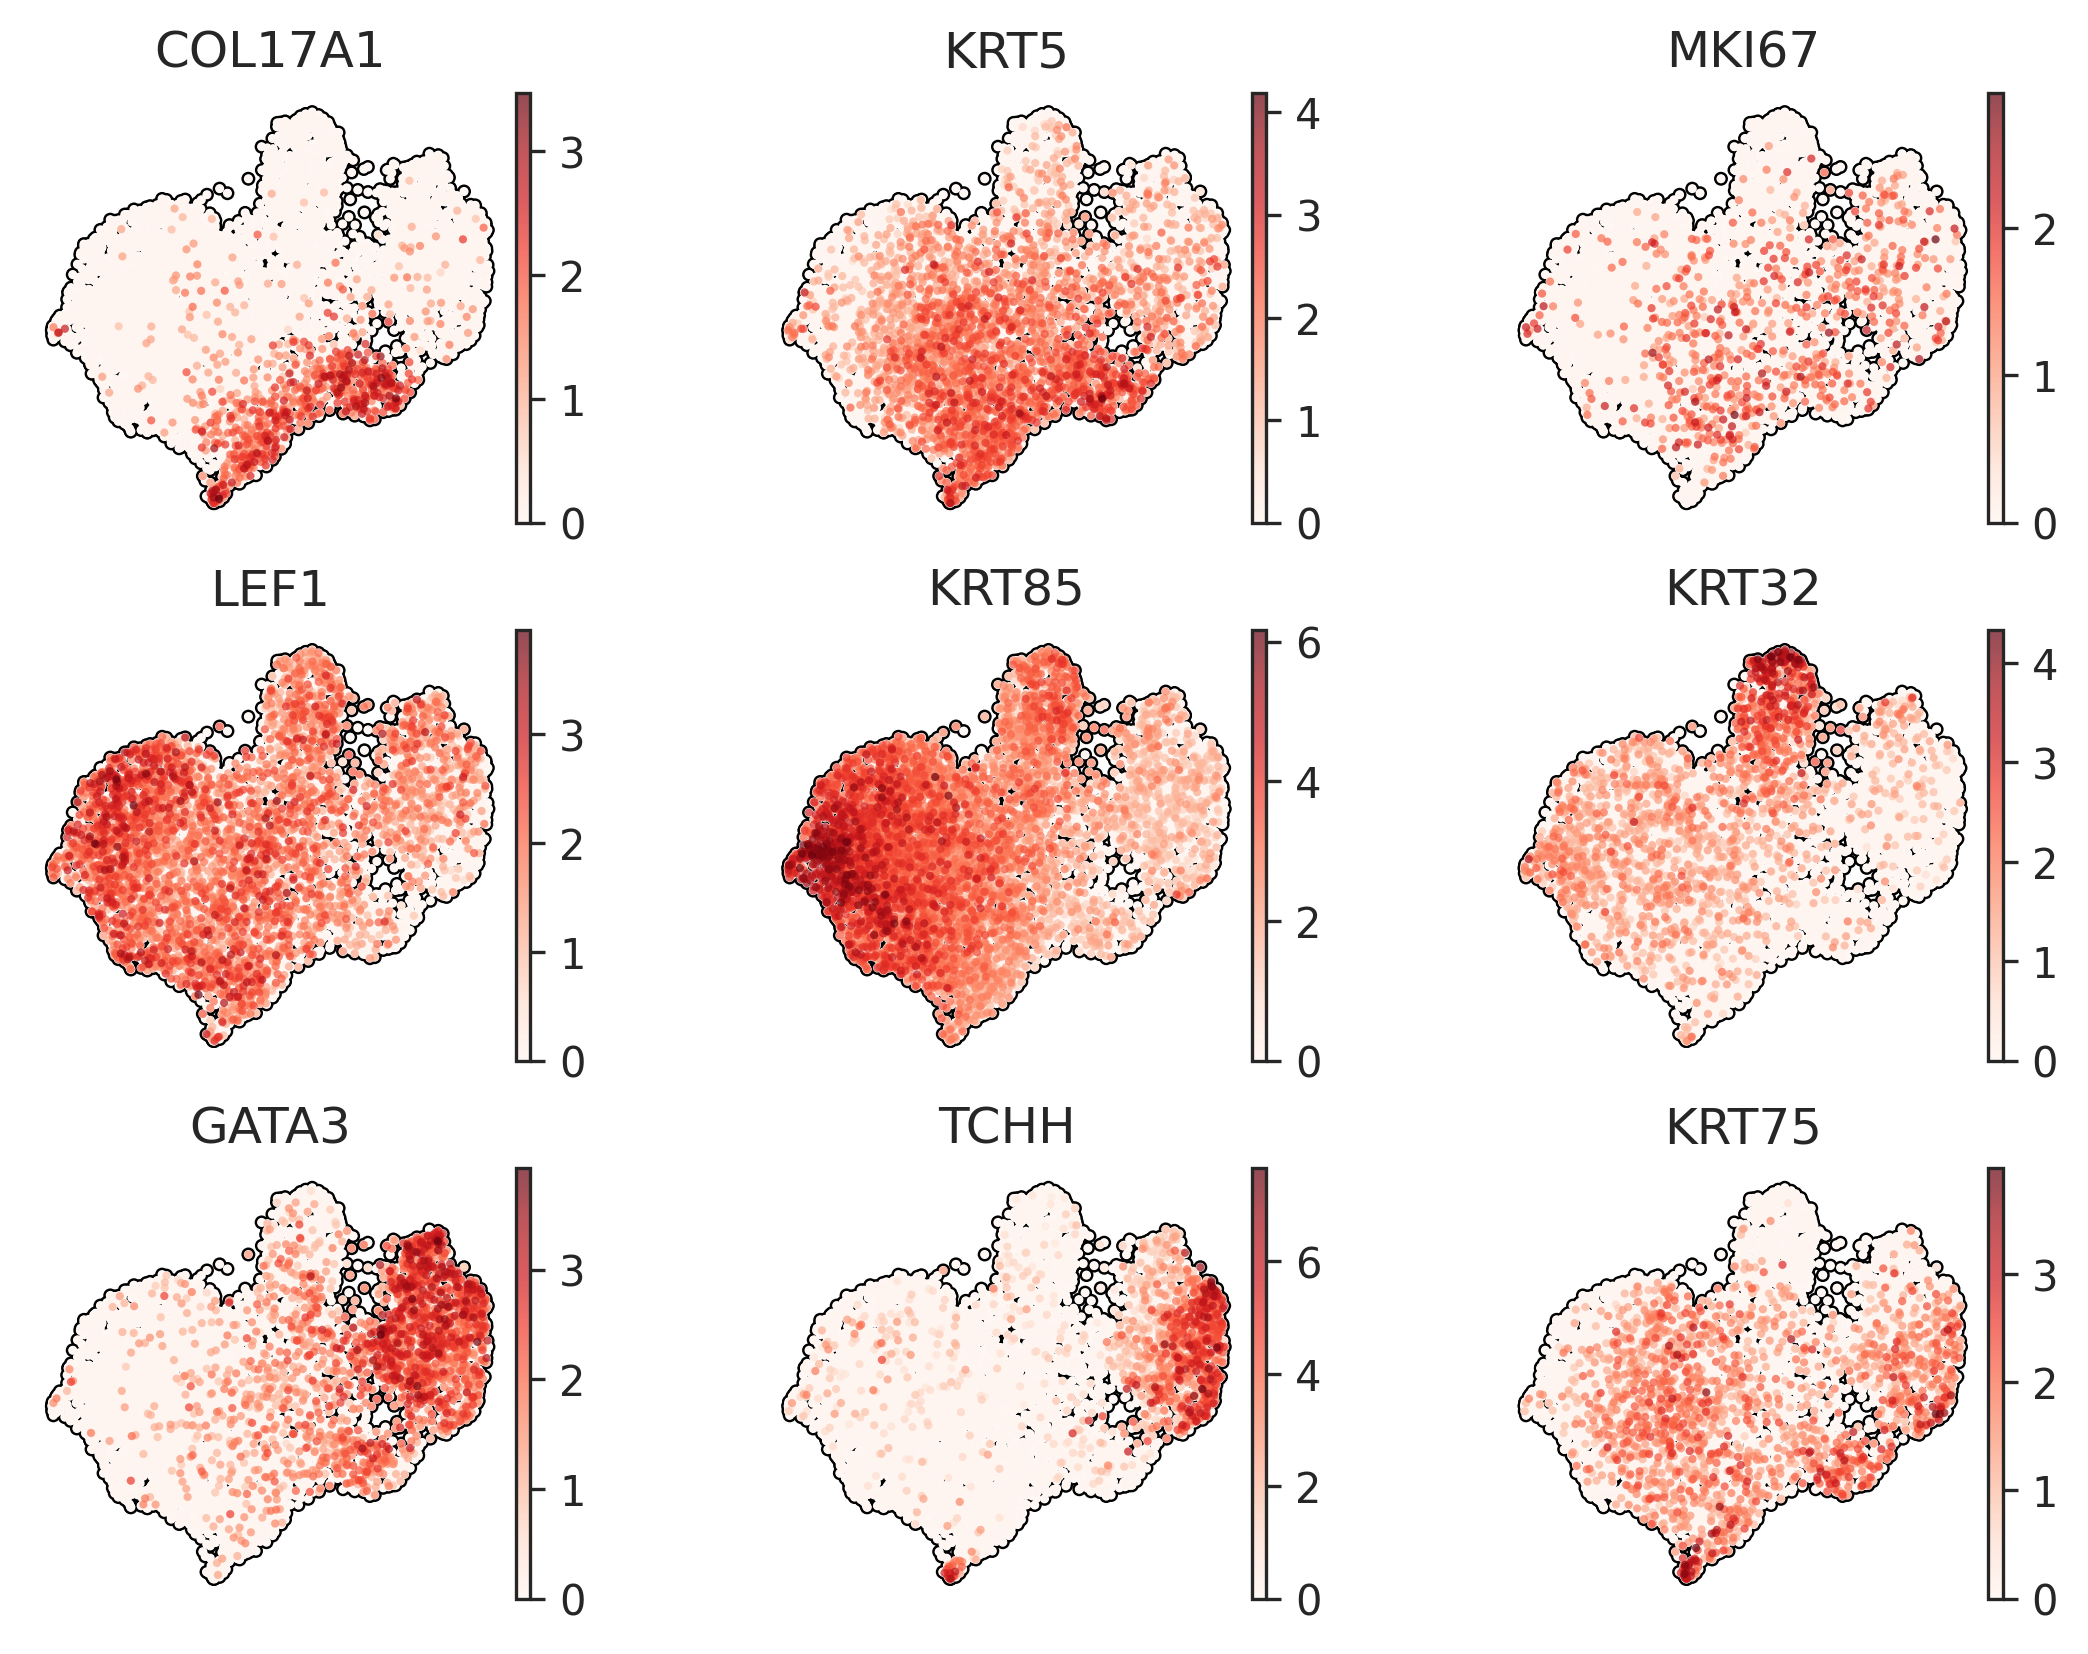

In [10]:
#--------Plotting Differentiation Markers: RNA UMAP--------#
print("---------------------------------------------")
print("        Gene Expression on RNA UMAP"          )
print("---------------------------------------------")
sc.pl.embedding(
    Matrix_rna,
    color= ['COL17A1', "KRT5", "MKI67", 'LEF1', 'KRT85', "KRT32", "GATA3", "TCHH", "KRT75"],
    basis = "X_umap_rna",
    frameon=False,
    add_outline=True,
    layer = "LogCounts",
    ncols = 3,
    # Setting a smaller point size to get prevent overlap
    cmap = "Reds")

---------------------------------------------
        Gene Expression on WNN UMAP
---------------------------------------------


/projects/b1217/Chris/condaenvs/SEACellsEnv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/projects/b1217/Chris/condaenvs/SEACellsEnv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(


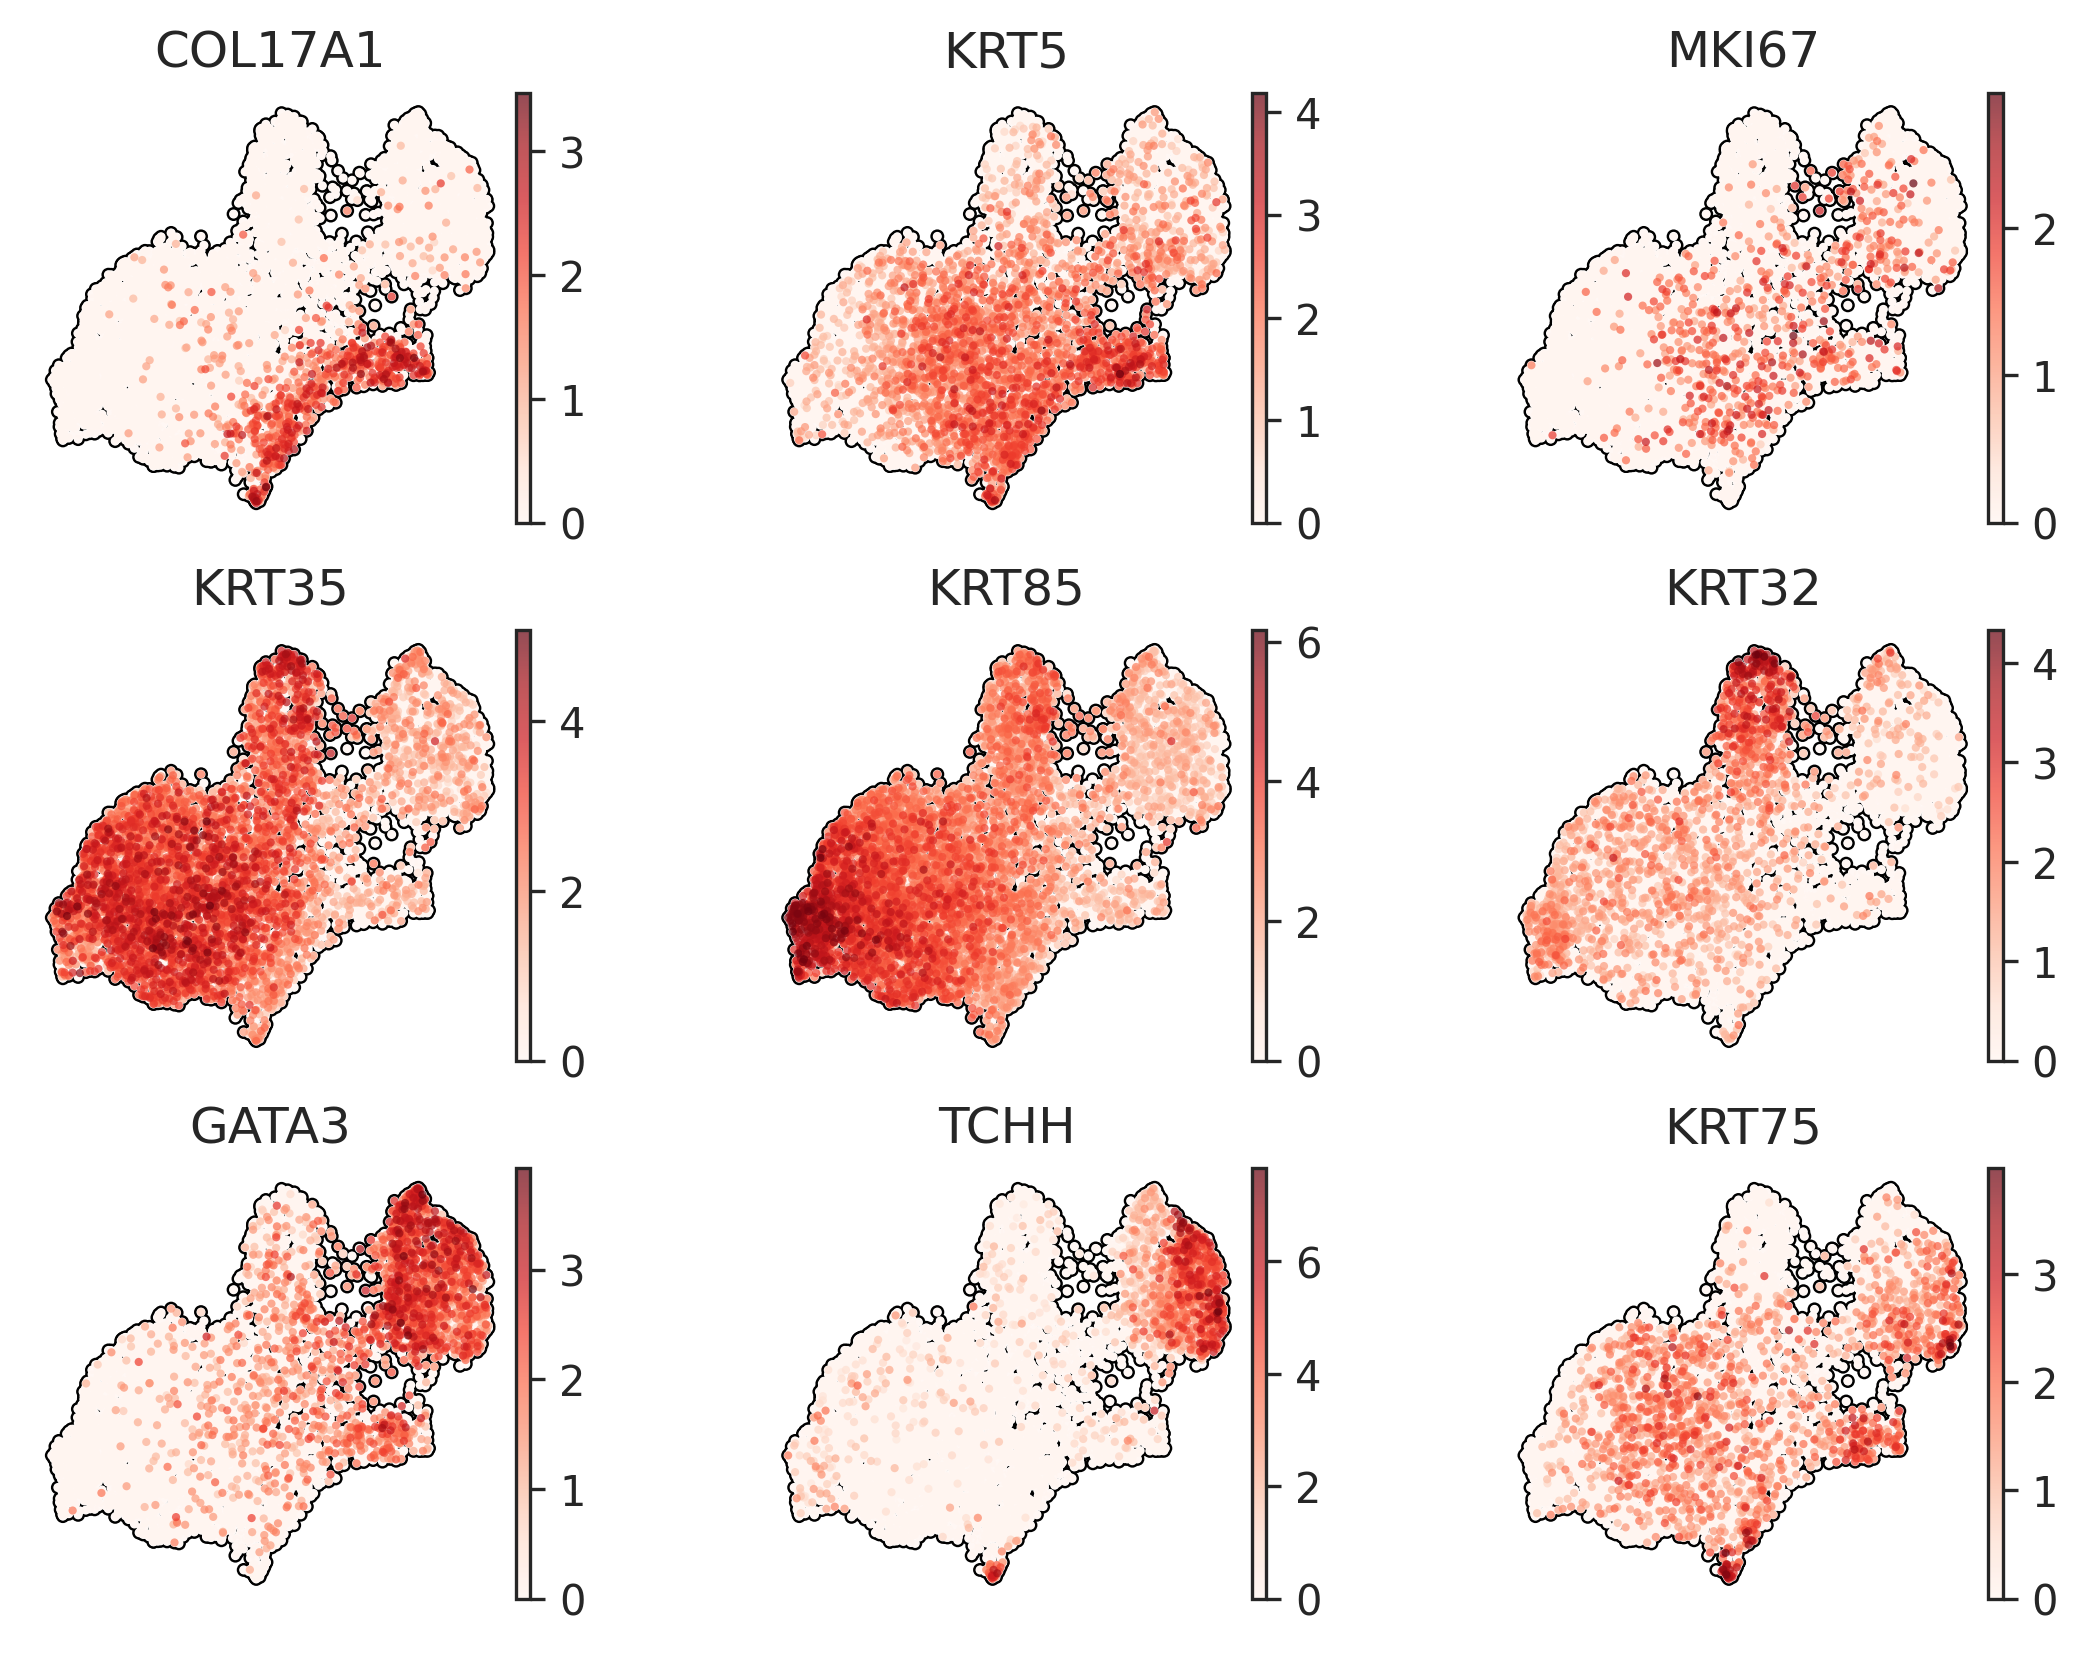

In [11]:
#--------Plotting Differentiation Markers: WNN UMAP--------#
print("---------------------------------------------")
print("        Gene Expression on WNN UMAP"          )
print("---------------------------------------------")
sc.pl.embedding(
    Matrix_rna,
    color= ['COL17A1', "KRT5", "MKI67", 'KRT35', 'KRT85', "KRT32", "GATA3", "TCHH", "KRT75"],
    basis = "X_umap_wnn",
    frameon=False,
    add_outline=True,
    layer = "LogCounts",
    ncols = 3,
    # Setting a smaller point size to get prevent overlap
    cmap = "Reds")

In [12]:
#-------Relabeling obs for metacell aggregation-----#
#SEACells expects DRs for metacell calculation to be X_pca and X_svd, we used a harmony corrected (lsi) svd for metacell generation
#Adding dummy pca layer to RNA data
Matrix_rna.obsm["X_pca"] = Matrix_rna.obsm["X_scvi"]
#Adding dummy svd to ATAC data
Matrix_atac.obsm["X_svd"] = Matrix_atac.obsm["X_harmony"]

In [13]:
#------Filtering for minimum peak and gene expression-----#
#Thresholding to peaks and genes expressed in at least 25 cells before aggregation for thresholding
min_cells = 25
#------Filtering RNA-------#
print("#genes before filtering:", Matrix_rna.shape[-1])
sc.pp.filter_genes(Matrix_rna, min_cells=min_cells)
print("#genes after filtering:", Matrix_rna.shape[-1])
#-----Filtering ATAC-----#
print("#peaks before filtering:", Matrix_atac.shape[-1])
sc.pp.filter_genes(Matrix_atac, min_cells=min_cells)
print("#peaks after filtering:", Matrix_atac.shape[-1])

#genes before filtering: 48834
#genes after filtering: 17554
#peaks before filtering: 503457
#peaks after filtering: 403028


In [14]:
#------Aggregating data into metacells------#
#Using ATAC metacells
atac_meta_ad, rna_meta_ad = SEACells.genescores.prepare_multiome_anndata(Matrix_atac,
                                                                         Matrix_rna,
                                                                         SEACells_label='SEACell')

Generating Metacell matrices...
 ATAC


100%|██████████| 103/103 [00:09<00:00, 10.95it/s]
/projects/b1217/Chris/condaenvs/SEACellsEnv/lib/python3.8/site-packages/SEACells/genescores.py:77: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  atac_ad.var['log_n_counts'] = np.ravel(np.log10(atac_ad.X.sum(axis=0)))
/projects/b1217/Chris/condaenvs/SEACellsEnv/lib/python3.8/site-packages/SEACells/genescores.py:58: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  rna_mod_ad.obs['temp'] = atac_mod_ad.obs[SEACells_label]


 RNA


100%|██████████| 103/103 [00:00<00:00, 161.16it/s]


In [15]:
#-----Double Checking Results------#
print(atac_meta_ad)
print(rna_meta_ad)

AnnData object with n_obs × n_vars = 103 × 403028
    obs: 'n_counts'
    var: 'GC_bin', 'counts_bin', 'n_cells'
    uns: 'log1p'
    obsm: 'X_svd'
    layers: 'raw'
AnnData object with n_obs × n_vars = 103 × 17554
    obs: 'n_counts'
    uns: 'log1p'
    layers: 'raw'


In [16]:
#-------Saving Objects for Command Line Run------#
work_dir = "/projects/b1217/HHA/Matrix_ATAC_SEACells/"
#Saving ATAC metacells
atac_meta_ad.write_h5ad(os.path.join(work_dir, ("Matrix_Multiome_atac_meta_ad.h5ad")))
#Saving RNA metacells
rna_meta_ad.write_h5ad(os.path.join(work_dir, ("Matrix_Multiome_rna_meta_ad.h5ad")))

In [17]:
#--------Reading in Peak-Gene Links--------#
import pickle
gene_peak_cors = pickle.load(open(os.path.join(work_dir, 'gene_peak_cors.pkl'), 'rb'))
len(gene_peak_cors)

17554

In [18]:
#------Getting number of peaks associated with each gene---------#
peak_counts = SEACells.genescores.get_gene_peak_assocations(gene_peak_cors, 
                                                           pval_cutoff=0.05,
                                                           cor_cutoff=0.25)
peak_counts

100%|██████████| 17554/17554 [00:03<00:00, 4663.44it/s]


gene
LINC01409     1
LINC00115     0
LINC01128     0
FAM41C        0
SAMD11        1
             ..
AL354822.1    0
AL592183.1    0
AC240274.1    0
AC004556.3    0
AC007325.4    0
Length: 17554, dtype: int64

Text(0, 0.5, 'No. of correlated peaks')

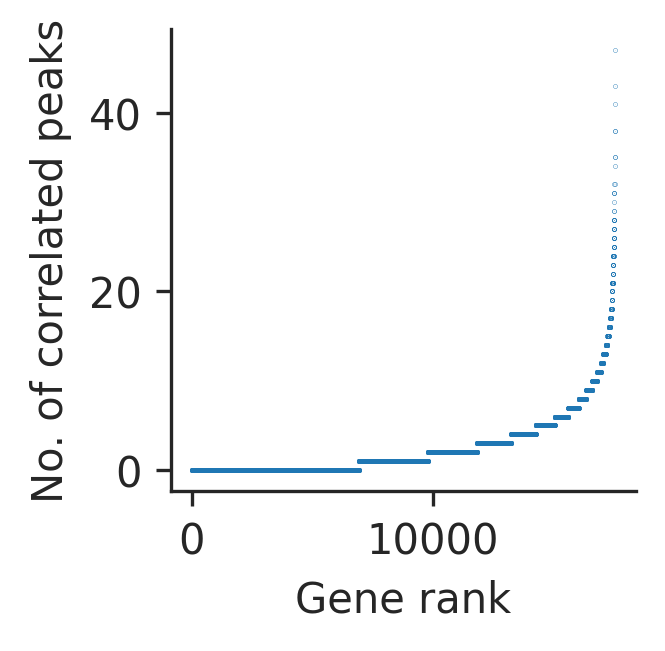

In [19]:
#-------Plotting Distribution of Peak Counts by Gene-----#
plt.scatter(np.arange(len(peak_counts)), 
           np.sort(peak_counts), s=0.01)
sns.despine()
plt.xlabel('Gene rank')
plt.ylabel('No. of correlated peaks')

In [20]:
#------Looking at HRGs---------#
peak_counts.sort_values(ascending = False).head(50)

gene
KAZN         47
CACNA1C      43
GPC1         41
PTPRE        38
EXT1         38
SNX9         35
SMAD3        35
NFIB         34
CHST15       32
AOPEP        32
SORCS2       31
KRT5         31
SLC7A5       31
TNS4         30
KRT75        29
GLI2         29
NOTCH1       28
KLK10        28
TENM2        28
LINC00511    28
TENM4        28
CREB5        28
CHST11       28
SEMA4C       27
PRICKLE2     27
KIF26A       27
CELSR1       27
SLC25A48     27
KLK7         27
AQP3         27
SLC14A2      26
NAV1         26
TSNARE1      26
MYH9         26
CCN4         26
LAMB3        26
IGFBP4       26
PTPRN2       26
RAPGEF1      25
SDC1         25
HOXC13       25
MIR31HG      25
ATP8A2       25
PTK2         25
SNX29        25
PALLD        25
CASZ1        25
ZNRF3        24
IGFBP2       24
NRG1         24
dtype: int64

In [21]:
#-------Writing Peak Correlation Counts to csv--------#
peak_counts_df = pd.DataFrame({"n_peaks": peak_counts})
#Writing to csv
peak_counts_df.to_csv(os.path.join(work_dir, "SEACells_Peak2GeneCounts_6_5_25.csv"))

In [22]:
#-------Getting gene accessbility metrics for HRGs------#
# Select genes based on the elbow point
high_reg_genes = peak_counts.index[peak_counts >= 8]
high_reg_genes

Index(['NOC2L', 'AGRN', 'TNFRSF18', 'ACAP3', 'MEGF6', 'TP73', 'AJAP1', 'ACOT7',
       'HES2', 'ESPN',
       ...
       'SLC9A7', 'NHSL2', 'SLC6A8', 'HGFAC', 'MEIOB', 'IQCJ-SCHIP1', 'BTBD11',
       'FAM189A1', 'C16orf72', 'ZADH2'],
      dtype='object', name='gene', length=1499)

In [23]:
#------Repeating P2G Linkage Analysis on HRGs-----#
#Subsetting for highly regulated genes
rna_meta_ad_hrg = rna_meta_ad[:, high_reg_genes].copy()
#writing to h5ad
rna_meta_ad_hrg.write_h5ad(os.path.join(work_dir, ("Matrix_Multiome_HRG_rna_meta_ad.h5ad")))
print(rna_meta_ad_hrg)

AnnData object with n_obs × n_vars = 103 × 1499
    obs: 'n_counts'
    uns: 'log1p'
    layers: 'raw'


In [24]:
#-------Getting Peak-Gene Cors for HRGs-----#
hrg_gene_peak_cors = pickle.load(open(os.path.join(work_dir, 'hrg_gene_peak_cors.pkl'), 'rb'))
len(hrg_gene_peak_cors)

1499

In [25]:
#------Getting number of peaks associated with each gene---------#
hrg_peak_counts = SEACells.genescores.get_gene_peak_assocations(hrg_gene_peak_cors, 
                                                           pval_cutoff=0.05,
                                                           cor_cutoff=0.25)
hrg_peak_counts

100%|██████████| 1499/1499 [00:00<00:00, 4218.07it/s]


gene
NOC2L          19
AGRN           10
TNFRSF18       26
ACAP3          30
MEGF6          15
               ..
IQCJ-SCHIP1    20
BTBD11         40
FAM189A1       25
C16orf72       20
ZADH2          17
Length: 1499, dtype: int64

Text(0, 0.5, 'No. of correlated peaks')

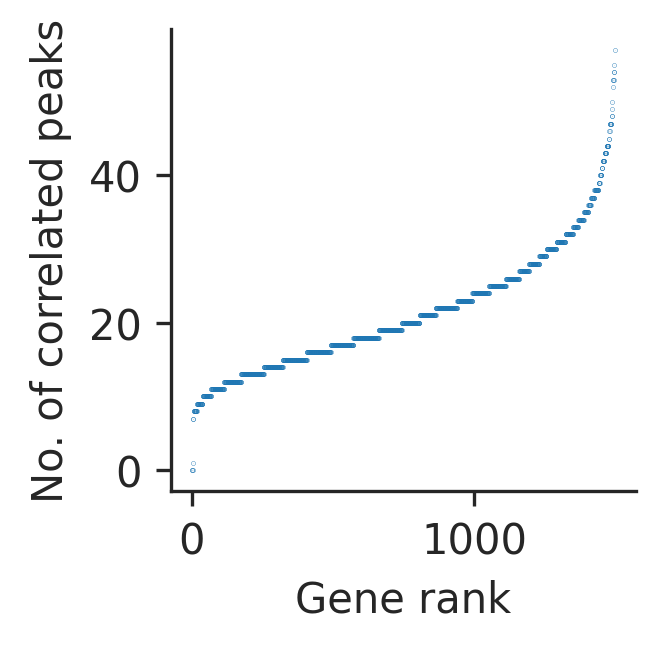

In [26]:
#-------Plotting Distribution of Peak Counts by Gene-----#
plt.scatter(np.arange(len(hrg_peak_counts)), 
           np.sort(hrg_peak_counts), s=0.01)
sns.despine()
plt.xlabel('Gene rank')
plt.ylabel('No. of correlated peaks')

In [27]:
#------Looking at HRGs---------#
hrg_peak_counts.sort_values(ascending = False).head(50)

gene
EXT1         57
ADGRB1       55
GPC1         54
SNX9         54
NOTCH1       53
CACNA1C      53
MED27        53
KAZN         52
CELSR1       50
SLC14A2      49
RAPGEF1      48
NDRG1        48
CHST15       47
HAGH         47
SMAD3        47
TNFRSF10B    47
SEPTIN9      47
DNASE1L2     47
KLK10        46
PARVA        46
IRF2BP2      45
IPO9-AS1     45
ODC1         44
ITGA6        44
GLI2         44
MT1X         44
KIF26A       44
CDH3         44
HOXC13       44
PTPRE        44
CLIC3        43
RHOBTB2      43
CDH23        43
CCN4         43
SORCS2       43
KLK7         43
AQP3         43
CSNK1A1      42
WHRN         42
KRT75        42
RANBP10      42
SAMD5        42
TNS4         42
KRT5         42
LINC00511    41
IGFBP4       41
LAMB3        41
CMIP         40
SLC39A14     40
LAMC2        40
dtype: int64

In [28]:
hrg_peak_counts.sort_values(ascending = False).tail(50)

gene
TANC1        10
STON2        10
IGSF9        10
FOS          10
PDGFD        10
VPS13C       10
DGKE         10
PDE4B        10
AGRN         10
PGM5         10
MIR4713HG    10
SMAD6        10
CFAP45        9
PSORS1C2      9
ERC2          9
CLMP          9
PIRT          9
DMD           9
PDE4D         9
SLC9A7        9
ARHGAP44      9
MPRIP         9
ANKRD29       9
DSE           9
TMTC1         9
MTSS2         9
DCT           9
BDKRB2        9
ACER3         9
TRAPPC9       9
NCOA7         9
TECR          9
CHL1          8
CADM2         8
HOXA3         8
MYB           8
LCMT1-AS1     8
GDPD1         8
HM13          8
COBL          8
TENT5A        8
SCD5          8
ECHDC1        8
PRDM2         8
PRR7          7
CERT1         7
AHRR          1
KANK1         0
DIP2C         0
B4GALNT3      0
dtype: int64

In [29]:
#-------Writing Peak Correlation Counts to csv--------#
hrg_peak_counts_df = pd.DataFrame({"n_peaks": hrg_peak_counts})
#Writing to csv
hrg_peak_counts_df.to_csv(os.path.join(work_dir, "SEACells_HRG_Peak2GeneCounts_6_5_25.csv"))

In [30]:
#-------Getting gene accessbility metrics for HRGs------#
# Select genes based on the elbow point
true_high_reg_genes = hrg_peak_counts.index[hrg_peak_counts >= 8]
true_high_reg_genes

Index(['NOC2L', 'AGRN', 'TNFRSF18', 'ACAP3', 'MEGF6', 'TP73', 'AJAP1', 'ACOT7',
       'HES2', 'ESPN',
       ...
       'SLC9A7', 'NHSL2', 'SLC6A8', 'HGFAC', 'MEIOB', 'IQCJ-SCHIP1', 'BTBD11',
       'FAM189A1', 'C16orf72', 'ZADH2'],
      dtype='object', name='gene', length=1493)

In [31]:
#------Getting csv of significant peak-gene correlations for HRGs---------#
#Filtering all peak correlations for those for high reg genes
HRG_gene_peak_cors = hrg_gene_peak_cors[true_high_reg_genes]
HRG_gene_peak_links = []

#-------Extracting significant peak-gene linkages--------#
#Creating list of data frames
HRG_gene_peak_links = []
#Creating list of dataframes corresponding to P-G linkages for each gene
for gene in HRG_gene_peak_cors.index:
    peak_cors = HRG_gene_peak_cors[gene]
    sig_peak_cors = peak_cors[(peak_cors["pval"] < 0.05) & (peak_cors["cor"] > 0.25)]
    sig_peak_cors["gene"] = gene
    HRG_gene_peak_links = HRG_gene_peak_links + [sig_peak_cors]
#Concatenating into a single dataframe
HRG_gene_peak_links = pd.concat(HRG_gene_peak_links)
#Adding a peak column. 
HRG_gene_peak_links["peak"] = HRG_gene_peak_links.index

<ipython-input-31-129ef2321229>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_peak_cors["gene"] = gene
<ipython-input-31-129ef2321229>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_peak_cors["gene"] = gene
<ipython-input-31-129ef2321229>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

<ipython-input-31-129ef2321229>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_peak_cors["gene"] = gene
<ipython-input-31-129ef2321229>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_peak_cors["gene"] = gene
<ipython-input-31-129ef2321229>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

<ipython-input-31-129ef2321229>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_peak_cors["gene"] = gene
<ipython-input-31-129ef2321229>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_peak_cors["gene"] = gene
<ipython-input-31-129ef2321229>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

<ipython-input-31-129ef2321229>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_peak_cors["gene"] = gene
<ipython-input-31-129ef2321229>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_peak_cors["gene"] = gene
<ipython-input-31-129ef2321229>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [32]:
#------Writing Significant P2G Linkages to csv-----#
print(HRG_gene_peak_links.head(20))
HRG_gene_peak_links.to_csv(os.path.join(work_dir, "Matrix_HRG_PG_Links_6_5_25.csv"), index = False)

                           cor      pval   gene                  peak
chr1:883377-883877    0.325645  0.000054  NOC2L    chr1:883377-883877
chr1:933023-933523    0.319713  0.016278  NOC2L    chr1:933023-933523
chr1:941631-942131    0.318795  0.022381  NOC2L    chr1:941631-942131
chr1:977956-978456    0.251890  0.027009  NOC2L    chr1:977956-978456
chr1:998696-999196    0.303385  0.007739  NOC2L    chr1:998696-999196
chr1:999902-1000402   0.354550  0.017106  NOC2L   chr1:999902-1000402
chr1:1006239-1006739  0.365568  0.015538  NOC2L  chr1:1006239-1006739
chr1:1025167-1025667  0.279421  0.004915  NOC2L  chr1:1025167-1025667
chr1:1074014-1074514  0.363073  0.015431  NOC2L  chr1:1074014-1074514
chr1:1074728-1075228  0.252817  0.039138  NOC2L  chr1:1074728-1075228
chr1:1080044-1080544  0.322734  0.024355  NOC2L  chr1:1080044-1080544
chr1:1107384-1107884  0.264118  0.007229  NOC2L  chr1:1107384-1107884
chr1:1121215-1121715  0.355911  0.012041  NOC2L  chr1:1121215-1121715
chr1:1237320-1237820